![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

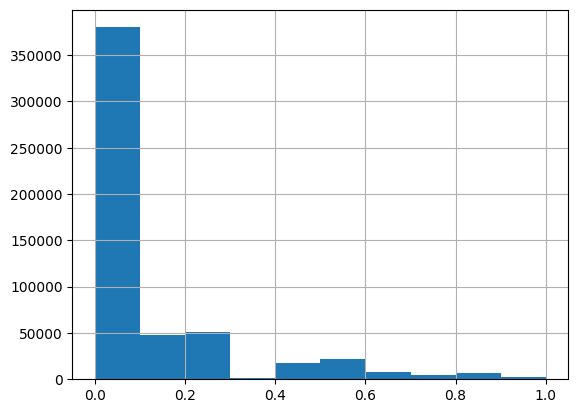

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
data = df[0:10000]
data.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
# Separación de variable de interés (y)
y = data.target
y.describe()

count    10000.000000
mean         0.102815
std          0.198588
min          0.000000
25%          0.000000
50%          0.000000
75%          0.166667
max          1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = data.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tw_1 = CountVectorizer(lowercase=False)
X_tw_train = tw_1.fit_transform(X_train)

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_tw_train, y_train)

X_tw_test = tw_1.transform(X_test)
y_pred_DT = DT.predict(X_tw_test)

mse_DT = mean_squared_error(y_test, y_pred_DT)
print("MSE modelo es: " + str(mse_DT))

MSE modelo es: 0.0438018282891432


Para predecir la probabilidad (y=Target) de que un comentario sea tóxico, se recurrió a un algoritmo de arbol de regresión. Se estimó el modelo a partír de una muestra transformada de comentarios (CountVectorizer, lowercase) y se evaluó su desempeño a partír de una muestra de comentarios de test transformados.

El MSE del modelo es de 0.04380, lo que es indicio de un rendimiento predictivo más que aceptable.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
tw_3 = CountVectorizer(lowercase=False, ngram_range=(3, 3))
X_tw_tr = tw_3.fit_transform(X_train)

In [ ]:
DT2 = DecisionTreeRegressor()
DT2.fit(X_tw_tr, y_train)

X_tw_ts = tw_3.transform(X_test)
y_pred_DT2 = DT2.predict(X_tw_ts)

mse_DT2 = mean_squared_error(y_test, y_pred_DT2)
print("MSE modelo es: " + str(mse_DT2))

MSE modelo es: 0.05466010541115568


Al utilizar tri-gramas para contruir el modelo, se observa una leve disminución en la metrica de desempeño MSE (0.05466) en comparación con el modelo original.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

**TF-IDF:** (Term Frequency Inverse Document Frequency)

Es una medida de la importancia relativa de un término dentro de un conjunto de documentos.

Es el producto de dos frecuencias explicadas a continuación:

*   Frecuencia del termino (TF): Es el numero de ocurrencias de un término dentro de un documento.

*   Frecuencia inversa de documento (IDF): Consiste en medir que tan común es un término dentro del conjunto de documentos estudiado (Se divide el numero de documentos disponibles sobre el número de documentos que contienen el término, y se toma el logaritmo del cociente). Esta variable penaliza términos demasiado comunes (stop words) o demasiado raros (no aportan información relevante).

Al aplicar este concepto es posible encontrar una medida estadística de la relevancia de un término lo que puede contribuir a entender mejor la estructura de la información y su contexto.

Ventajas:

*   Comparado con Count Vectorizer, TF-IDF brinda más información para el análisis, ya que al proporcionar un índice de relevancia para cada término permite asignar pesos a las palabras y eliminar aquellas que no se consideren relevantes dentro del contexto del documento (facilitando el análisis y óptimizando los procesos).


* Incluye un análisis global dentro de los documentos de interés, en comparación con el análisis más local de Count Vectorizer que restringe el alcance de los resultados.


**TfidfVectorizer:**
Es una herramienta de NLP que se utiliza para convertir una colección de documentos de texto en una matriz de características basada en el esquema TF-IDF.

Realiza las siguientes etapas:
* Tokenización: Divide cada documento en palabras o tokens.
Conteo de Frecuencia de Término (TF): Calcula la frecuencia de cada término en cada documento.
* Cálculo del IDF: Calcula el valor IDF para cada término en función de su frecuencia en todo el corpus.
* Multiplicación de TF por IDF: Multiplica el valor TF por el valor IDF para obtener el valor TF-IDF para cada término en cada documento.
* Normalización: Opcionalmente, normaliza los valores TF-IDF para que estén en una escala común.

El resultado final es una matriz donde cada fila representa un documento y cada columna representa un término, con los valores TF-IDF correspondientes.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
tw_4 = TfidfVectorizer()
X_tw_tr_TF = tw_4.fit_transform(X_train)

In [ ]:
DT3 = DecisionTreeRegressor()
DT3.fit(X_tw_tr_TF, y_train)

X_tw_ts_TF = tw_4.transform(X_test)
y_pred_DT3 = DT3.predict(X_tw_ts_TF)

mse_DT3 = mean_squared_error(y_test, y_pred_DT3)
print("MSE modelo es: " + str(mse_DT3))

MSE modelo es: 0.046589751959263036


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

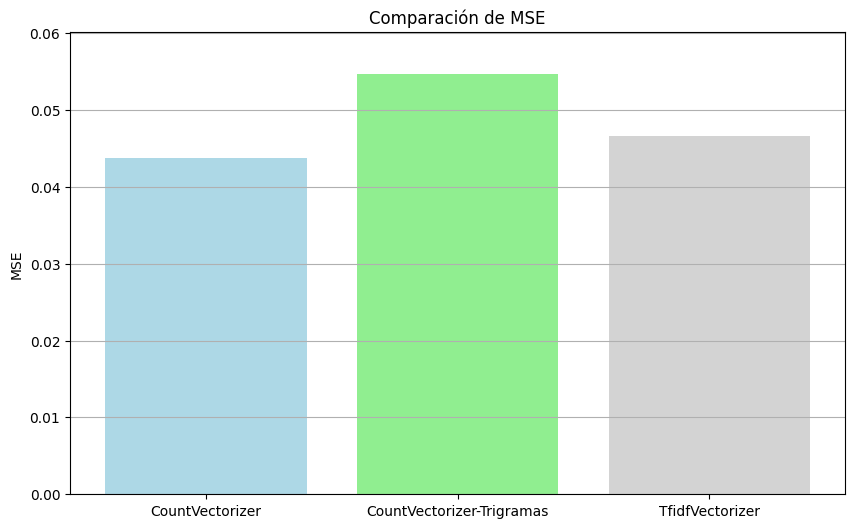

In [ ]:
# Celda 5
import matplotlib.pyplot as plt

model_names = ['CountVectorizer', 'CountVectorizer-Trigramas', 'TfidfVectorizer']
errors = [mse_DT, mse_DT2, mse_DT3]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, errors, color=['lightblue', 'lightgreen', 'lightgray'])

plt.ylabel('MSE')
plt.title('Comparación de MSE')
plt.ylim(0, max(errors) * 1.1)
plt.grid(axis='y')
plt.show()

Al analizar los resultados obtenidos, se observa que el mejor rendimiento (menor MSE) se obtuvo con el primer modelo estimado (CountVectorizer, lowercase=False), sin embargo, la diferencia es mínima en comparación con el modelo TfidfVectorizer lo que sugiere que para este conjunto de datos ambos metodos son capaces de generar buenos resultados predictivos.

Ambos algoritmos utilizan métricas basadas en la frecuencia de palabras o términos, para este caso en particular, se puede afirmar que fué más efectiva la "contabilización de terminos" (conteo de palabras), que la estimación y tokenización de su "importancia relativa", lo que dentro del contexto de análisis (Toxicidad de comentarios) revela que es posible encontrar patrones dentro de la toxicidad en los textos, y que una vez se han detectado esos términos comunes se facilita su clasificación y su predicción.

**Nota: Los modelos se generaron a partír de una muestra de datos más pequeña debido a limitaciones computacionales.**